# Marketing expenses research

This is a study project dedicated to `Business Analytics` theme from `Yandex.Practicum Data Analysis` course.

**Key words**: LTV, CAC, ROMI, cohort analysis. 

**Libraries used**: pandas, matplotlib, seaborn, scipy.

## Table of contents

- [Project's goal](#goal)
- [Data preprocessing](#preprocessing)
- [Business analytics](#ba)
    - [Product](#product)
    - [Sales](#sales)
    - [Marketing](#marketing)
- [Conclusion](#conclusion)

## Project's goal<a id='goal'></a>

The project's goal is to to help Yandex.Afisha optimize marketing expenses. 


### We have the following data:

- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

### We are going to study:
1. How people use the product
2. When they start to buy
3. How much money each customer brings
4. When they pay off


## Data preprocessing<a id='preprocessing'></a>

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
def get_info(df):
    
    # function to get basic info about the dataset
    
    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())        

### We are going to:

1. download datasets
2. check data types  
3. optimize memory usage
4. eliminate errors

### Visits

In [3]:
from io import BytesIO
import requests
spreadsheet_id = '1GrXf6sTxssGoj3T-VJ8fnTJ05iBz3G3SL4dN0zncg6c'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r1 = requests.get(file_name)
visits = pd.read_csv(BytesIO(r1.content))

get_info(visits)

Head:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None


Description of quantitative parameters:


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19



Description of categorical parameters:


,Device,End Ts,Start Ts
count,359400,359400,359400
unique,2,224760,224303
top,desktop,2017-11-24 16:51:00,2017-11-24 16:06:00
freq,262567,23,19



Columns with NaN values:


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


Shape:


(359400, 5)


Number of duplicated rows:


0

In [4]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [6]:
visits['Device'] = visits['Device'].astype('category') 
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S") 
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Orders

In [7]:
spreadsheet_id = '1zGqavExieYSpKhdlCnsa9KphMJz4VX5Kj9W-dgCbc9o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r2 = requests.get(file_name)
orders = pd.read_csv(BytesIO(r2.content))

get_info(orders)

Head:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None


Description of quantitative parameters:


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19



Description of categorical parameters:


,Buy Ts
count,50415
unique,45991
top,2018-05-31 10:13:00
freq,9



Columns with NaN values:


Buy Ts     0
Revenue    0
Uid        0
dtype: int64


Shape:


(50415, 3)


Number of duplicated rows:


0

In [8]:
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S") 
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Costs

In [9]:
spreadsheet_id = '1JR5nrW4RjyHP03ctSKJQqkIEDMaOleqDFvbpvWETDBI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r3 = requests.get(file_name)
costs = pd.read_csv(BytesIO(r3.content))

get_info(costs)

Head:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None


Description of quantitative parameters:


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000



Description of categorical parameters:


,dt
count,2542
unique,364
top,2018-03-10
freq,7



Columns with NaN values:


source_id    0
dt           0
costs        0
dtype: int64


Shape:


(2542, 3)


Number of duplicated rows:


0

In [10]:
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S") 
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Conclusion
*We've checked basic information about the data, changed some data types, no critical errors found.*

The **visits** table (server logs with data on website visits):
- `Uid` — user's unique identifier
- `Device` — user's device
- `Start Ts` — session start date and time
- `End Ts` — session end date and time
- `Source Id` — identifier of the ad source the user came from

The **orders** table (data on orders):
- `Uid` — unique identifier of the user making an order
- `Buy Ts` — order date and time
- `Revenue` — Yandex.Afisha's revenue from the order

The **costs** table (data on marketing expenses):
- `source_id` — ad source identifier
- `dt` — date
- `costs` — expenses on this ad source on this day


## Business analytics<a id='ba'></a>

## Product <a id='product'></a>

### How many people use Yandex.Afisha every day, week, and month?

In [11]:
visits['session_date'] = visits['Start Ts'].dt.date
visits['session_week'] = visits['Start Ts'].astype('datetime64[W]')
visits['session_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['session_year'] = visits['Start Ts'].astype('datetime64[Y]')

dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

print('Daily Active Users: {:.0f}'.format(int(dau_total)))

Daily Active Users: 907


In [12]:
print('Weekly Active Users: {:.0f}'.format(int(wau_total)))

Weekly Active Users: 5621


In [13]:
print('Monthly Active Users: {:.0f}'.format(int(mau_total)))

Monthly Active Users: 23228


In [14]:
visits_per_user = visits.groupby(['session_year', 'session_month']).agg({'Uid': ['count','nunique']})
visits_per_user.columns = ['visits', 'users']
visits_per_user['visits_per_user'] = (visits_per_user['visits'] / visits_per_user['users']).round(2)
visits_per_user['visits_per_day'] = (visits_per_user['visits'] / 30).round()
visits_per_user

visits  users  visits_per_user  visits_per_day
session_year session_month                                                
2017-01-01   2017-06-01      16505  13259             1.24           550.0
             2017-07-01      17828  14183             1.26           594.0
             2017-08-01      14355  11631             1.23           478.0
             2017-09-01      23907  18975             1.26           797.0
             2017-10-01      37903  29692             1.28          1263.0
             2017-11-01      43969  32797             1.34          1466.0
             2017-12-01      41983  31557             1.33          1399.0
2018-01-01   2018-01-01      36939  28716             1.29          1231.0
             2018-02-01      37182  28749             1.29          1239.0
             2018-03-01      35679  27473             1.30          1189.0
             2018-04-01      26515  21008             1.26           884.0
             2018-05-01      26635  20701             1.29           888.0

#### Conclusion
1. Each day Yandex.Afisha has around 900 unique visitors.
2. But on average users visit the website just once. 
    - One group of users probably just visit once without making an order 
    - Another group, which buys something once is unlikely to return
3. So, we would suggest to improve customer retention, so they come back and make more orders
4. There is a significant raise in visits during (2017-10, 2018-03) period.


### How often do users come back?

In [15]:
print('Weekly Sticky factor:', round(int(dau_total) / (int(wau_total)) * 100, 1))

Weekly Sticky factor: 16.1


In [16]:
print('Monhtly Sticky factor:', round(int(dau_total) / (int(mau_total)) * 100, 1))

Monhtly Sticky factor: 3.9


In [17]:
first_session = visits.groupby('Uid')['Start Ts'].min()
first_session.name = 'first_session_month'
retention_rate = visits.join(first_session, on='Uid')
retention_rate['first_session_month'] = retention_rate['first_session_month'].astype('datetime64[M]')
retention_rate['session_month'] = retention_rate['Start Ts'].astype('datetime64[M]')
retention_rate['cohort_lifetime'] = retention_rate['session_month'] - retention_rate['first_session_month']
retention_rate['cohort_lifetime'] = retention_rate['cohort_lifetime'] / np.timedelta64(1,'M')
retention_rate['cohort_lifetime'] = retention_rate['cohort_lifetime'].round().astype('int')

cohorts_retention = (retention_rate
                       .groupby(['first_session_month', 'cohort_lifetime'])
                       .agg({'Uid': 'nunique'})
                       .reset_index()
          )

init_users_count = cohorts_retention[cohorts_retention['cohort_lifetime']==0][['first_session_month', 'Uid']]
init_users_count = init_users_count.rename(columns={'Uid': 'cohort_users'})

cohorts_retention = cohorts_retention.merge(init_users_count, on='first_session_month')
cohorts_retention['retention'] = cohorts_retention['Uid']/cohorts_retention['cohort_users']

retention_pivot_rel = cohorts_retention.pivot_table(index='first_session_month', columns='cohort_lifetime',
                                      values='retention', aggfunc='sum')
retention_pivot_rel = (retention_pivot_rel).round(4)

In [18]:
retention_mean = pd.Series(retention_pivot_rel.apply('mean', axis=0))
retention_mean.name = 'retention_mean' 
retention_pivot_rel= retention_pivot_rel.append(retention_mean)


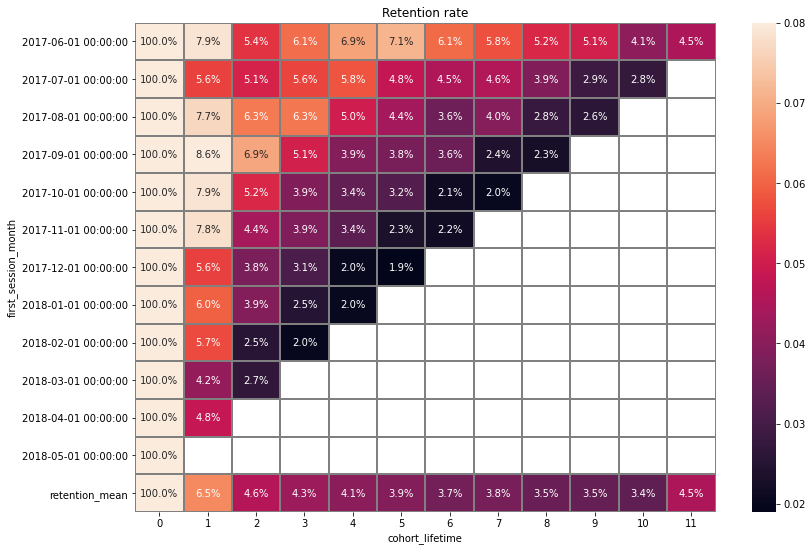

In [19]:
plt.figure(figsize=(13, 9))
plt.title('Retention rate')
sns.heatmap(retention_pivot_rel, vmax="0.08",  annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

#### Conclusion
1. Rather low **sticky factor** confirms that user retention needs improvement.
2. First cohort shows the best retention rate.
3. Sadly, as time goes by, cohorts' retention rate starts decreasing sooner.

### How many sessions are there per day? 


In [20]:
sessions_total = visits.groupby('session_date')['Uid'].count().mean()
print('Number of sessions per day:', round(sessions_total))

Number of sessions per day: 987


### What is the length of each session?


In [21]:
visits['session_length'] = (visits['End Ts'] - visits['Start Ts'])
visits['session_length'].describe()

count                    359400
mean     0 days 00:10:43.025687
std      0 days 00:16:37.127760
min           -1 days +23:14:00
25%             0 days 00:02:00
50%             0 days 00:05:00
75%             0 days 00:14:00
max             0 days 11:51:00
Name: session_length, dtype: object

In [22]:
visits['session_length'].sort_values()

177972   -1 days +23:14:00
4181     -1 days +23:28:00
141593            00:00:00
251174            00:00:00
70748             00:00:00
                ...       
221945            08:44:00
1197              09:02:00
248062            09:08:00
177381            09:56:00
229891            11:51:00
Name: session_length, Length: 359400, dtype: timedelta64[ns]

In [23]:
#removing negative values
visits.loc[visits['End Ts'] < visits['Start Ts'],['Start Ts','End Ts']] = visits.loc[visits['End Ts'] < visits['Start Ts'],['End Ts','Start Ts']].values


In [24]:
visits.loc[visits['End Ts'] < visits['Start Ts']]

,Device,End Ts,Source Id,Start Ts,Uid,session_date,session_week,session_month,session_year,session_length


In [25]:
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S") 

In [26]:
visits['session_length'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits['session_length'].describe()

count    359400.000000
mean        643.051731
std         997.110965
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_length, dtype: float64

In [27]:
Q1 = visits['session_length'].quantile(0.25)
Q3 = visits['session_length'].quantile(0.75)
IQR = Q3 - Q1

upper_whisker = Q3+1.5*IQR

In [28]:
sessions_without_outliers = visits.query('session_length < @upper_whisker')
sessions_without_outliers['session_length'].describe()

count    333185.000000
mean        438.368870
std         467.183512
min           0.000000
25%          60.000000
50%         240.000000
75%         660.000000
max        1860.000000
Name: session_length, dtype: float64

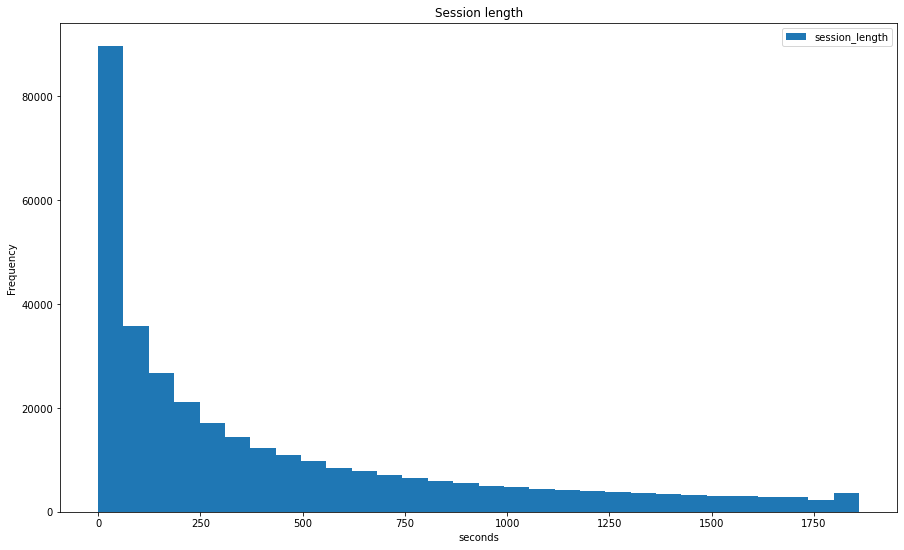

In [29]:
sessions_without_outliers['session_length'].plot(kind='hist', legend=True, title='Session length', bins = 30, figsize=(15,9))
plt.xlabel('seconds')
plt.show()

In [30]:
print('Most common session duration is around', int(visits['session_length'].mode()), 'seconds')

Most common session duration is around 60 seconds


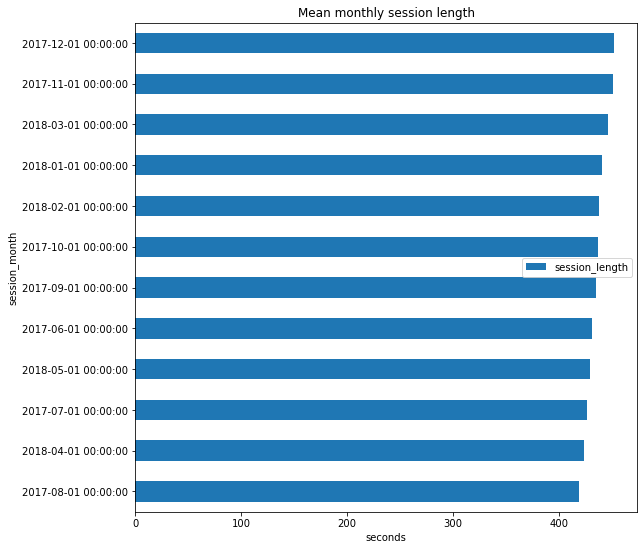

In [31]:
session_length_month = sessions_without_outliers.groupby(['session_month']).agg({'session_length':'mean'}).sort_values('session_length').plot(kind='barh', figsize=(9,9), title="Mean monthly session length")
plt.xlabel('seconds')
plt.show()


#### Conclusion

1. Most of the sessions are around 1 minute. Probably, those are the short visits without an order.
2. The first 6 leaders in average session length are the months from the period (2017-10, 2018-03) 


### Product conclusion

Yandex.Afisha is a product which allows browse events and buy tickets. During our analysis of how people use the product, we've noticed that:
1. users visit the website and make purchases, but they do not generally come back again. That is why we can recommend to investigate different strategies of improving user retention via the product: encourage repeat purchases, remind customers about unfinished purchase, etc.
2. session duration is generally very short, so it would make sense to introduce features that would keep users' attention, for example: comments, critic reviews, quizes, interviews with celebrities, etc

## Sales <a id='sales'></a>

### When do people start buying? 

In [32]:
first_visit_date = visits.groupby('Uid')['Start Ts'].min()
first_visit_date.name = 'first_visit_datetime'

first_order_date = orders.groupby('Uid')['Buy Ts'].min()
first_order_date.name = 'first_order_datetime'

visits = visits.join(first_visit_date, on='Uid')
visits = visits.join(first_order_date, on='Uid')

visits['time_until_order'] = (visits['first_order_datetime'] - visits['first_visit_datetime']).dt.seconds

In [33]:
visits_per_device = visits.groupby('Device').agg({'Uid': 'count'})
visits_per_device

,Uid
Device,
desktop,262567
touch,96833


In [34]:
visits['time_until_order'] = visits['time_until_order'] / 60

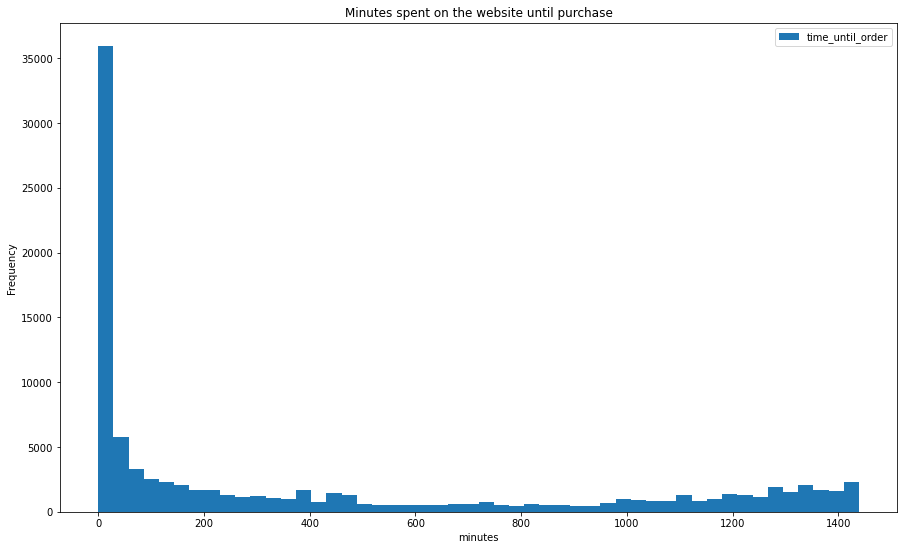

In [35]:
visits['time_until_order'].plot(kind='hist', title="Minutes spent on the website until purchase", legend=True, bins=50, figsize=(15, 9))
plt.xlabel('minutes')
plt.show()

In [36]:
visits['time_until_order'].describe()

count    97394.000000
mean       412.501253
std        501.278844
min          0.000000
25%          9.000000
50%        132.000000
75%        839.000000
max       1439.000000
Name: time_until_order, dtype: float64

#### Conclusion
1. There are 3 times more visits from desktop than from touch devices.  
2. Average time user spends from the first visit until the first order is 2 hours.


### How many orders do they make during a given period of time?


In [37]:
orders = orders.join(first_order_date, on='Uid')

orders['order_date'] = orders['Buy Ts'].dt.date
orders['order_week'] = orders['Buy Ts'].astype('datetime64[W]')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['order_year'] = orders['Buy Ts'].astype('datetime64[Y]')
orders['first_order_month'] = orders['first_order_datetime'].astype('datetime64[M]')

In [38]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'Uid':'count'})

In [39]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

lifetime_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='Uid') 


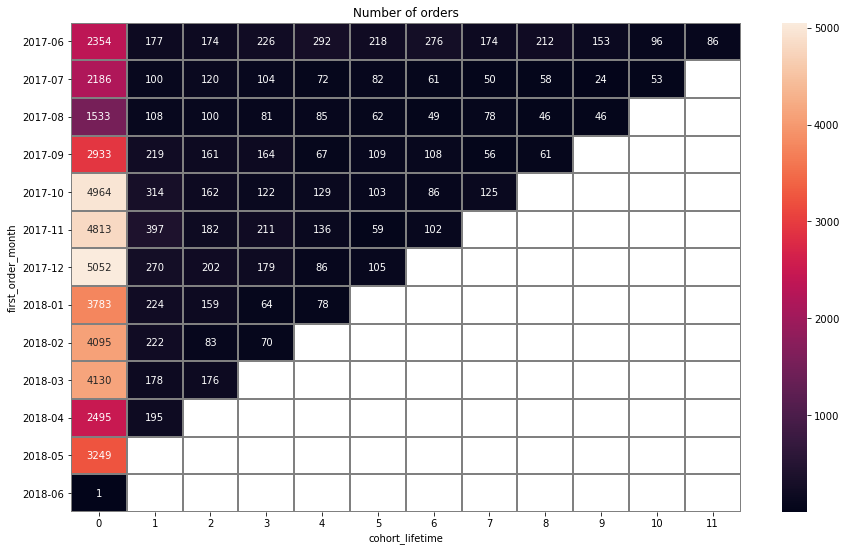

In [40]:
plt.figure(figsize=(15, 9))
plt.title('Number of orders')
sns.heatmap(lifetime_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray', yticklabels=lifetime_pivot.index.strftime('%Y-%m')) 
plt.show()

#### Conclusion
1. On the "Number of orders" heatmap we can notice again our "active months": the highest number of orders is during the period (2017-10, 2018-03)
2. Users don't generally come back to Yandex.Afisha to buy something again. Most of the purchases are made in the "0 lifetime".

### What is the average purchase size?


In [41]:
revenue_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum', 'Uid':'count'})

In [42]:
revenue_grouped_by_cohorts = revenue_grouped_by_cohorts.reset_index()
revenue_grouped_by_cohorts['cohort_lifetime'] = revenue_grouped_by_cohorts['order_month'] - revenue_grouped_by_cohorts['first_order_month']
revenue_grouped_by_cohorts['cohort_lifetime'] = revenue_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
revenue_grouped_by_cohorts['cohort_lifetime'] = revenue_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

revenue_grouped_by_cohorts['order_average'] = revenue_grouped_by_cohorts['Revenue'] / revenue_grouped_by_cohorts['Uid']   


In [43]:
revenue_pivot = revenue_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='order_average') 


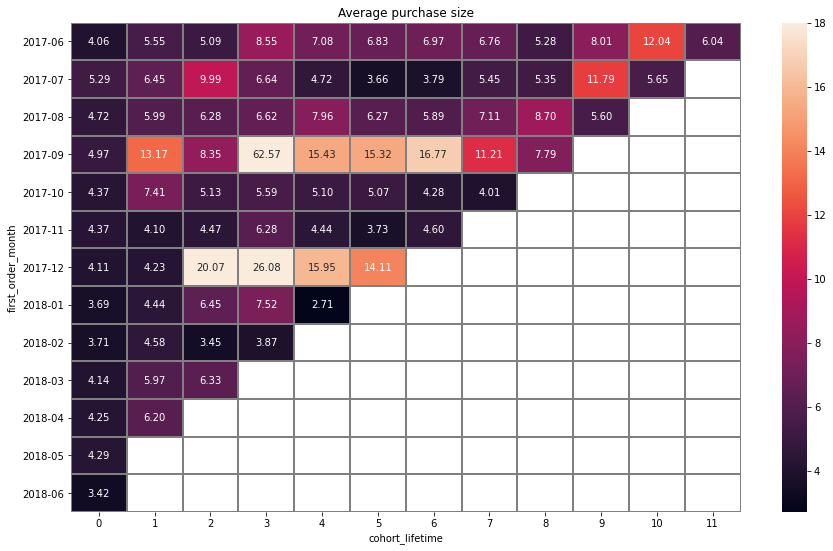

In [44]:
plt.figure(figsize=(15, 9))
plt.title('Average purchase size')
sns.heatmap(revenue_pivot, vmax='18', annot=True, fmt='.2f', linewidths=1, linecolor='gray', yticklabels=revenue_pivot.index.strftime('%Y-%m')) 
plt.show()

#### Conclusion
1. There are some anomalies in 2017-09 and 2017-12 on the "Average purchase size", probably there were big orders from one user.
2. But there are no significant drops, so we don't see for now what else should be investigated here.

### How much money do they bring? (LTV)
*margin rate is considered to be equal 1 

In [45]:
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 1 

In [46]:
orders.drop('first_order_month', inplace=True, axis=1)
orders_ = pd.merge(orders, first_orders, on='Uid') # add the month of the first order to the DataFrame with purchases

In [47]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue':'sum'}).reset_index() # group the orders into cohorts
report = pd.merge(cohort_sizes, cohorts, on='first_order_month') # merge cohorts and cohort_sizes

In [48]:
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean') # calculate values for the pivot table

In [49]:
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5] # find the cumulative LTV for 6 months from the moment the first order was made

print('Average LTV for 6 months from the first order:', m6_cum_ltv)

Average LTV for 6 months from the first order: 7.969052630207336


In [50]:
result=result.cumsum(axis=1)

ltv_mean = pd.Series(result.apply('mean', axis=0))
ltv_mean.name = 'LTV_mean' 
result= result.append(ltv_mean)

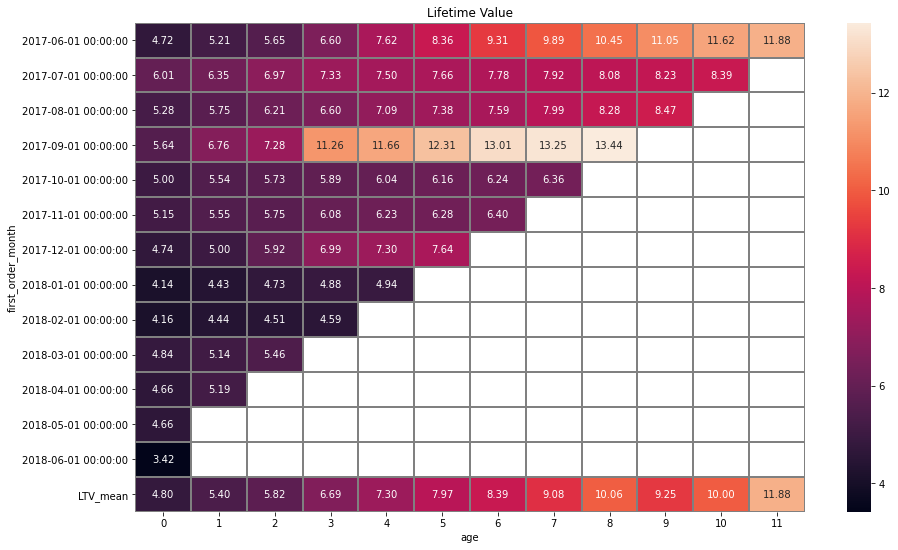

In [51]:
plt.figure(figsize=(15, 9))
plt.title('Lifetime Value')
sns.heatmap(result, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 
plt.show()

#### Conclusion

1. 2017-06 and 2017-09 cohorts show the best LTV
2. For marketing investments to pay off in 6 months, customer acquisition should not cost more than 8.
3. Cohorts starting 2018-01 show really slow growth, they may not pay off

### Sales conclusion
Sales analysis proved a point, stated earlier: user retention needs improvement. 
Besides, we would recommend:
1. Investigate cohorts, which showed the best LTV.
2. Pay attention to the recent cohorts, as they may not pay off.

### Marketing <a id='marketing'></a>


### How much money was spent? 


In [52]:
costs['costs'].sum()

329131.62

In [53]:
costs_by_source = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').sort_values('costs', ascending=False)
costs_by_source

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


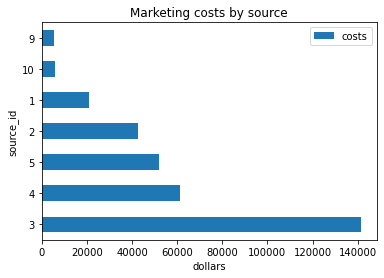

In [71]:
costs_by_source.plot(kind='barh', title='Marketing costs by source')
plt.xlabel('dollars')
plt.show()

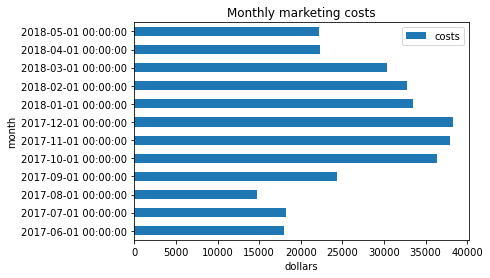

In [55]:
costs['month'] = costs['dt'].astype('datetime64[M]')
#costs_by_month = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').sort_values('costs', ascending=False)
monthly_costs = costs.pivot_table(index='month', values='costs', aggfunc='sum')
monthly_costs.plot(kind='barh', title='Monthly marketing costs')
plt.xlabel('dollars')
monthly_costs = monthly_costs.reset_index()
#monthly_costs['costs'].plot(kind='barh')


#### Conclusion
1. Significantly more money was spent on source 3 than on other sources.  
2. During the period (2017-10, 2018-03) marketing costs were much higher than during othre months.

### How much did customer acquisition from each of the sources cost?


In [56]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [57]:
visits['Source Id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

There are no marketing costs for sources 6 and 7

In [58]:
visits_sorted = visits.sort_values(by='Start Ts')

costs_per_source_month = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()
                             
first_source_per_user = visits_sorted.groupby('Uid').agg({'Source Id': 'first'})

client_per_source = orders.merge(first_source_per_user, on='Uid')

In [59]:
client_per_source_month = client_per_source.groupby(['Source Id', 'order_month']).agg({'Uid': 'nunique'})
client_per_source_month=client_per_source_month.reset_index()
client_per_source_month.columns = ['source_id','month', 'uid']

In [60]:
cac_per_source_month = costs_per_source_month.merge(client_per_source_month, on=['source_id', 'month'], how='right')

In [61]:
cac_per_source_month['cac'] = cac_per_source_month['costs']/cac_per_source_month['uid']
cac_per_source_month.fillna(0)
cac_per_source_month.pivot_table(index='source_id', values='costs', aggfunc='sum').sort_values('costs', ascending=False)

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49
7,0.00


In [62]:
cac_per_source_month.pivot_table(index='source_id', values='cac', aggfunc='mean').sort_values('cac', ascending=False)

,cac
source_id,
3,12.549463
2,10.437308
5,6.785264
1,6.171785
4,5.955655
10,4.581108
9,4.233346


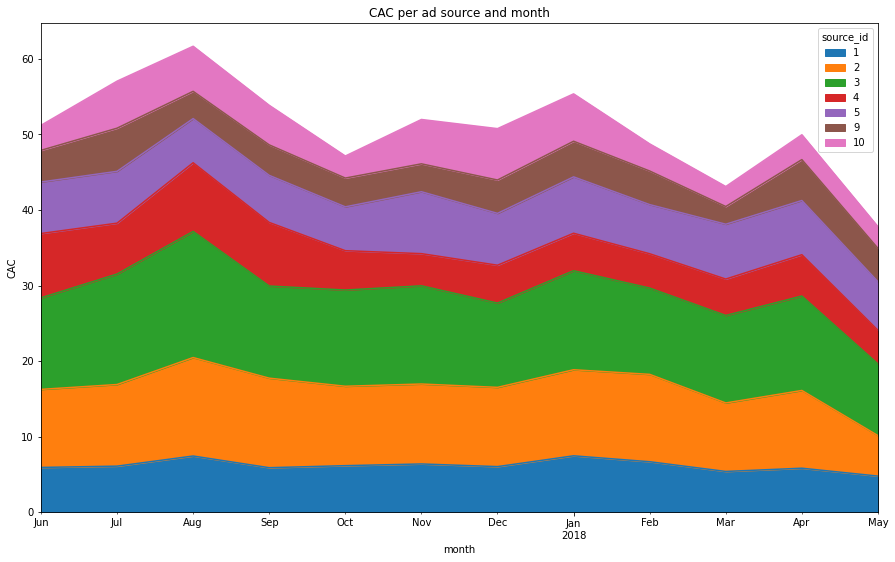

In [63]:
cac_per_source_month.pivot_table(
    index='month', 
    columns='source_id', 
    values='cac').plot(kind='area', figsize=(15, 9))#, stacked=False)
plt.title('CAC per ad source and month')
plt.ylabel('CAC')
plt.show()

#### Conclusion
1. Source 3 has highest costs. 
2. Sources 2 and 3 have highest CAC.
3. Sources 9 and 10 have lowest costs and CAC.
3. From the area plot we can notice that: 
    - CA costs generally decrease in course of time
    - there is a raise in CAC in 2017-08, 2018-01 and 2018-04 among all ad sources


### How worthwhile were the investments? (ROI)

In [64]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']

In [65]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

In [66]:
output = output.cumsum(axis=1)

roi_mean = pd.Series(output.apply('mean', axis=0))
roi_mean.name = 'ROI_mean' 
output= output.append(roi_mean)

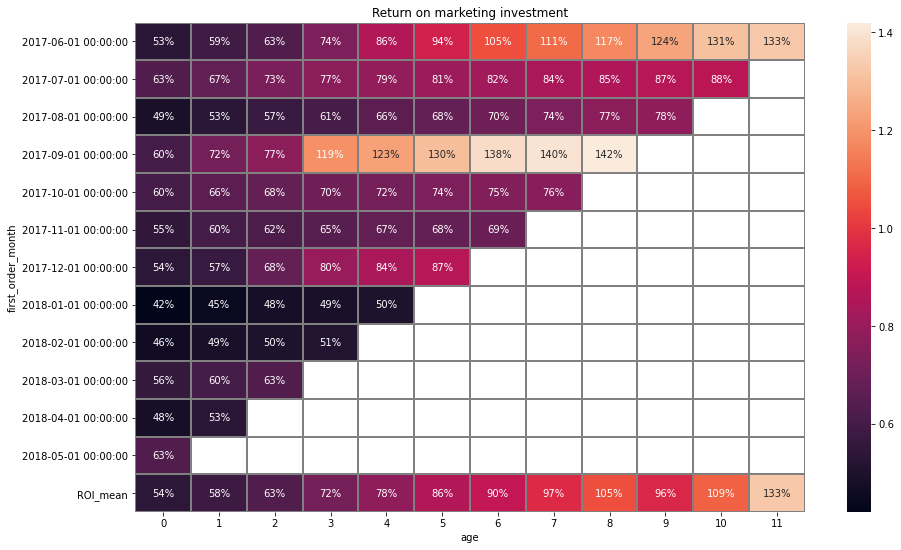

In [67]:
plt.figure(figsize=(15, 9))
plt.title('Return on marketing investment')
sns.heatmap(output.round(2) , annot=True, fmt='.0%', linewidths=1, linecolor='gray') 
plt.show()

#### Conclusion
1. 2017-06 and 2017-09 cohorts paid off.
2. 2017-12 cohort shows promising `roi`
3. Other cohorts might not pay off marketing investments

## Marketing conclusion
During the data analysis we've noticed that periods with higher marketing expenses (2017-10, 2018-03) show higher number of visits and orders. That is why we would advise to continue investing in ad sources.

We suggest to optimize marketing expenses in the following way:
1. The **ad source 9** and **10** have the lowest CAC and overall costs. We would recommend to invest in these sources more.
2. The **ad source 3** has highest costs(2-3 times more than other sources), we are not sure if more investments will make sense.
3. **Ad sources 6** and **7** have incomplete data for now, it would be interesting to investigate those more to be able to draw any insights.



## Overall Conclusion <a id='conclusion'></a>

After the thorough analysis, we can sum up our recommendations.

**Product and Sales**

1. Most of the users do not come back after their first visit/purchase. So, we would advise to work on the product to make it more attractive to the customer and encourage repeat visits and purchases.
2. User sessions are generally very short, it could be beneficial to hold user's attention longer.
3. There are significantly more visits from desktop than touch devices, we would recommend to investigate this. Nowadays, people are inseparable with their smartphones. It should be convenient to make purchases using touch devices. 

We would suggest to take a look at the product and see how it can be altered to become more attractive, interesting and comfortable for the potential clients.

**Marketing**

1. Marketing investments in ad sources should be redistributed to decrease overall customer acquisition costs. 
2. Most of the cohorts do not pay off according to ROI, which confirms that marketing investments need revision.
3. Though, we've noticed that the period of highest marketing investments (2017-10, 2018-03) is characterized by higher user activity (more and longer visits and more orders). At the same time CAC hasn't increased drastically during this period. That's why we would suggest that it makes sense to increase overall marketing investments, too.

We would advise to investigate ad sources more, as for now we lack information about the kinds of sources used, ad formats, reasons behind the amount of funding in each source, were there any ad campaigns, promotions or discounts, etc. This will allow to make decisions about investments' increase and distribution.

